In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
from scipy import signal
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset

### How am I calculating density and stratification to normalize w variance?



In [4]:
outdir = '/data/SO2/sio-kramosmusalem/04_feb_TSref_output/'
levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels)

In [5]:
depth = ds.Depth[:]
LAT = ds['YC'][:]
LON = ds['XC'][:]-360
lat = ds.YC[:,0].data
lon = ds.XC[0,:].data-360

Z = ds['Z'][:]
Zl = ds['Zl'][:]

nx = len(lon)
ny = len(lat)
nz = len(Z)

# centers mask
hFacC = ds['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

#### Define variables:

In [6]:
Tref = np.squeeze(ds['THETA'][0,...])
Sref = np.squeeze(ds['SALT'][0,...])
tAlpha=2.E-4
sBeta=7.4E-4
rhoNil=999.8
rhoRef=np.expand_dims(np.expand_dims(ds['rhoRef'][:],1),1)+np.zeros_like(Tref)

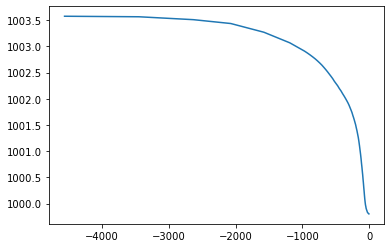

In [7]:
plt.plot(Z,ds['rhoRef'][:])

In [8]:
def calc_rho(ds, tt, tAlpha=2.E-4, sBeta=7.4E-4, rhoNil=999.8):
    '''calculate density rho as rho = rhoRef + rho_anom at time tt'''
    Tref = np.squeeze(ds['THETA'][0,...])
    Sref = np.squeeze(ds['SALT'][0,...])
    rhoRef=np.expand_dims(np.expand_dims(ds['rhoRef'][:],1),1)+np.zeros_like(Tref)
    rho = rhoRef + rhoNil*np.ones_like(Tref)*(sBeta*(ds['SALT'][tt,...]-Sref)-
                                              tAlpha*(ds['THETA'][tt,...]-Tref))
    return(rho)

def calc_N2(Z, rho, rhoNil=999.8, g=9.81):
    Zexp = np.expand_dims(np.expand_dims(Z,1),1)+np.zeros_like(rho)
    N2 = -(g/rhoNil)*(rho.data[2:,...]-rho.data[:-2,...])/(Zexp[2:,...]-Zexp[:-2,...])
    return(N2)

In [9]:
tt=70
rho = calc_rho(ds, tt)
N2 = calc_N2(Z,rho)

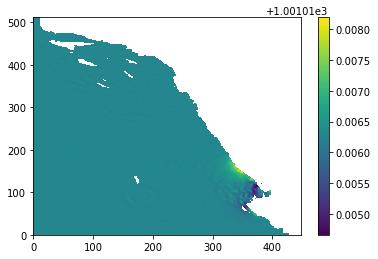

In [10]:
plt.pcolormesh(np.ma.masked_array(rho[30,:,:], mask=mask[30,:,:]))
plt.colorbar()

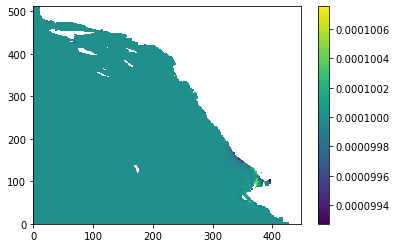

In [11]:
plt.pcolormesh(np.ma.masked_array(N2[29,:,:], mask=mask[30,:,:]))
plt.colorbar()

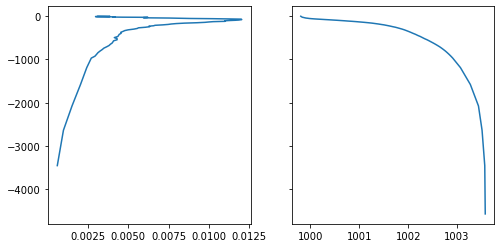

In [12]:
fig,(ax0,ax1) = plt.subplots(1,2,figsize=(8,4), sharey=True)
ax0.plot(np.sqrt(N2[:,1,1]),Z[1:-1])
ax1.plot(rho[:,1,1],Z[:])